# 1.1 多项式曲线拟合

模式识别（Pattern Recognition）是一门关于如何从数据中发掘潜在规律，然后用这些规律来辅助人类做决策的学科。本节将从一个多项式曲线拟合的经典例子出发，讲述模式识别问题中所涉及的重要概念，以获得对模式识别问题更深入的理解。
## 问题背景
在这个例子中，假设我们有两个变量$x, t$，它们满足如下关系：
$$t=sin(2\pi x)+\epsilon$$
其中$\epsilon$是一个均值为$0$、标准差为$0.3$的高斯噪声。我们首先在$[0,1]$区间内等间距地产生了10个点$\mathbf{x}=(x_1,...,x_{10})^T$，接着根据如上的关系为这$10$个点得到一组对应的目标函数值$\mathbf{t}=(t_1,...,t_{10})^T$。

这种数据产生方式符合大部分现实世界中的数据集的性质，即产生样本时既包含潜在的规律，又伴随着随机噪声。这些随机噪声的产生原因可能是某种内在的随机性，也可能是某种未被观测到的因素。我们的目标是根据这$10$个点构成的训练集$\mathcal{D}=\{(x_1,t_1),...,(x_{10},t_{10})\}$调整模型的参数来拟合目标函数$sin(2\pi x)$，然后用学习到的模型对新的样本$\hat{x}$预测其对应的$\hat{t}$。


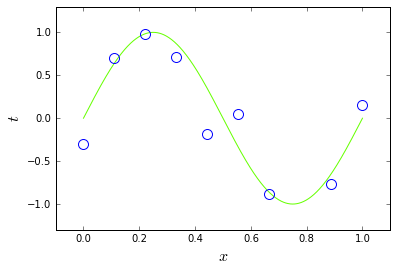

In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 1, 1001)
t = np.sin(2 * np.pi * x)
x_tr = np.linspace(0, 1, 10)
t_tr = np.sin(2 * np.pi * x_tr) + np.random.normal(0, 0.3, 10)
plt.plot(x, t, color="#66FF00")
plt.plot(x_tr, t_tr, 'o',  markerfacecolor='none' ,markeredgecolor='b', markersize=10, markeredgewidth=1)
plt.xlim(-0.1, 1.1)
plt.ylim(-1.3, 1.3)
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$t$', fontsize=16)
plt.show()

## 线性模型
在这个问题中，我们将使用一个多项式曲线来拟合真实目标函数：
$$y(x,\mathbf{w})=\sum_{j=0}^Mw_jx^j$$
其中$\mathbf{w}=\{w_0,...,w_M\}$称为该多项式的系数，$x^j$表示$x$的$j$次幂，M称为多项式的阶。注意到，$y(x,\mathbf{w})$是关于$x$的非线性函数，而同时又是系数$\mathbf{w}$的线性函数，这样的模型称为*线性模型（linear model）*。线性模型的优点是既可以表示复杂的曲线，又具有解析解。  
我们引入一个*误差函数（error function）*来衡量模型在一个数据集上的表现，通过最小化训练误差函数来找到线性模型的最佳参数值。线性回归问题中，最常用的误差函数就是平方和误差（sum of squares error）
$$ E(\mathbf{w})=\frac{1}{2}\sum_{n=1}^N \{y(x_n,\mathbf{w})-t_n\}^2$$


## 模型选择
在确定了模型的参数后，我们还需要确定多项式的阶$M$，有时我们也把它叫做模型复杂度（model complexity）。$M$的值越小，可以表示的曲线越简单，拟合能力也越弱；$M$的值越大，可以表示的曲线就越丰富，拟合能力也越强。那么$M$是不是越大越好呢？其实不然。让我们来看下面几张图：


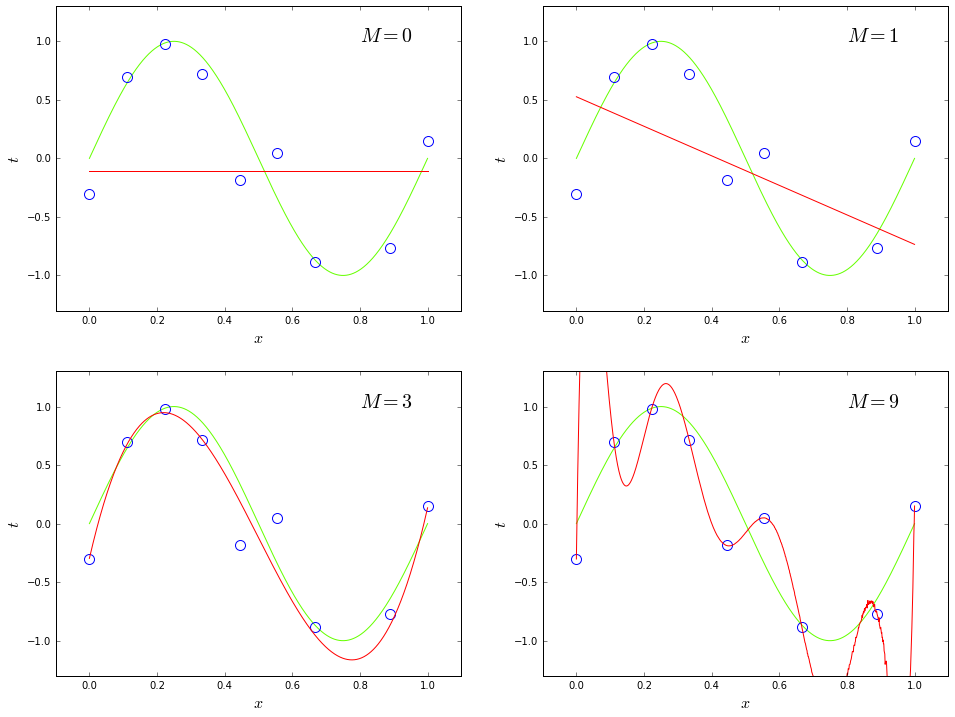

In [26]:
def polyfit(x, t, M):
    '''polynomial curve fitting
    # Arguments:
        x: vector of input variables
        t: targets of input variables
        M: degree of polynomial model
    # Returns:
        coefficients of the polynomial model
    '''
    X = np.array([[xx ** m for m in range(M+1)] for xx in x], dtype='float32')
    #return np.linalg.pinv(X).dot(t)
    # more accurate version, equivalent to pinv
    return np.linalg.lstsq(X, t)[0]
    
def predict(w, x):
    '''make predictions for x
    # Arguments:
        w: coefficients of the polynomial model
        x: vector of input variables
    # Returns:
        predicted target variables
    '''
    X = np.array([[xx ** m for m in range(M+1)] for xx in x], dtype='float32')
    return X.dot(w)

M_vals = [0, 1, 3, 9]
fig, axes = plt.subplots(2, 2, figsize=(16,12))
axes = np.ravel(axes)
for M, ax in zip(M_vals, axes):
    w = polyfit(x_tr, t_tr, M)
    ax.plot(x, t, color="#66FF00")
    ax.plot(x_tr, t_tr, 'o',  markerfacecolor='none' ,markeredgecolor='b', markersize=10, markeredgewidth=1)
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-1.3, 1.3)
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$t$', fontsize=16)
    ax.plot(x, predict(w, x), 'r-')
    ax.text(0.8, 1, '$M={}$'.format(M), size=20)

从图中我们看到，当$M=0$或$M=1$时多项式变为直线，不足以刻画训练集中的非线性关系，这种现象称为*欠拟合（under-fitting）*；当$M=9$时，我们发现拟合曲线恰好经过训练集的所有点，虽然此时训练集上的误差为0，但是曲线剧烈震荡，可推广性很差，这种现象称为*过拟合（over-fitting）*；当$M=3$时，我们发现曲线的拟合效果是最好的。因此，模型复杂度并不是越高越好，针对一个问题我们要选择合适的模型复杂度以获得良好的泛化能力，选择适宜模型复杂度的过程称为*模型选择（model selection）*。

## 泛化能力定量评估

由于我们事先知道数据是如何产生的，因此我们可以额外再生成若干个样本点作为测试集来定量描述$M$的变化对于模型泛化能力的影响。当数据规模$N$增加时，平方和误差$E(\mathbf{w})$也随之增加，这为公平比较不同规模数据集的误差带来了难度。为了便于比较不同规模数据集上的误差，我们定义均方根误差（root-mean-square error，RMSE）：
$$ E_{RMS}=\sqrt{2E(\mathbf{w})/N}$$
通过求平均，我们可以在同一基准比较不同的数据集上的误差；开根号后的值可以理解为目标变量的平均偏差。  
具体地，我们将产生100个测试样本点，并计算当$M$取不同的值时，测试集上的误差。

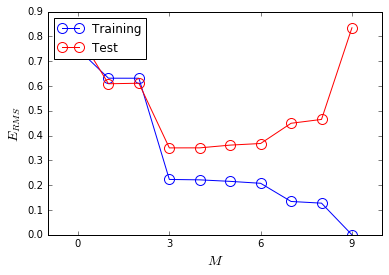

In [27]:
n_te = 100
x_te = np.linspace(0, 1, n_te)
t_te = np.sin(2 * np.pi * x_te) + np.random.normal(0, 0.3, n_te)
rmse_tr = []
rmse_te = []
for M in np.arange(10):
    w = polyfit(x_tr, t_tr, M)
    y_tr = predict(w, x_tr)
    y_te = predict(w, x_te)
    rmse_tr.append(np.sqrt(np.sum((y_tr - t_tr)**2) / len(t_tr)))
    rmse_te.append(np.sqrt(np.sum((y_te - t_te)**2) / len(t_te)))
plt.plot(np.arange(10), rmse_tr, 'bo-',  markerfacecolor='none' ,markeredgecolor='b', markersize=10, markeredgewidth=1, label='Training')
plt.plot(np.arange(10), rmse_te, 'ro-',  markerfacecolor='none' ,markeredgecolor='r', markersize=10, markeredgewidth=1, label='Test')
plt.xlabel('$M$', fontsize=14)
plt.ylabel('$E_{RMS}$', fontsize=14)
plt.xlim(-1, 10)
plt.xticks([0, 3, 6, 9])
plt.legend(loc='upper left')
plt.show()

从图中我们可以看出，当$M$的取值范围为$0$到$2$时，测试集的误差较高，这是因为此时的模型还不够灵活，不足以刻画$sin(2\pi x)$这种非线性关系；当$M$的取值范围为$3$到$8$时，测试集误差较低，泛化能力最好；当$M=9$时，我们发现训练集上的误差为0，这是因为我们的模型刚好有$10$个自由度$\{w_0,w_1,...,w_{9}\}$，因此可以被调整到刚好经过这$10$个点，但这也导致了模型参数被过度调整以拟合样本中的噪声，作为后果，模型在测试集上的误差与训练集上的表现相去甚远，此时模型发生了过拟合。  
我们可以输出$M=9$时的模型参数：

In [28]:
M = 9
for i, ww in enumerate(polyfit(x_tr, t_tr, M)):
    print 'w_{}={:.2f}'.format(i, ww)

w_0=-0.30
w_1=199.94
w_2=-4412.31
w_3=39899.06
w_4=-188923.68
w_5=516701.51
w_6=-845509.91
w_7=816448.67
w_8=-428812.35
w_9=94409.53


可以看到，正是由于系数的数量级很高引起了曲线的剧烈震荡。

## 防止过拟合
过拟合是机器学习中普遍存在的问题，如何解决过拟合就成了机器学习的一个重要的研究热点。这里介绍两种结局过拟合的方法，第一种方法是增加训练数据量，第二种方法是正则化（regularization）。  
### 增加数据量
增加数据量可以有效防止过拟合。直观上来说，当数据量增加时，我们更有能力负担起复杂的模型，从而显著改善模型的泛化能力。

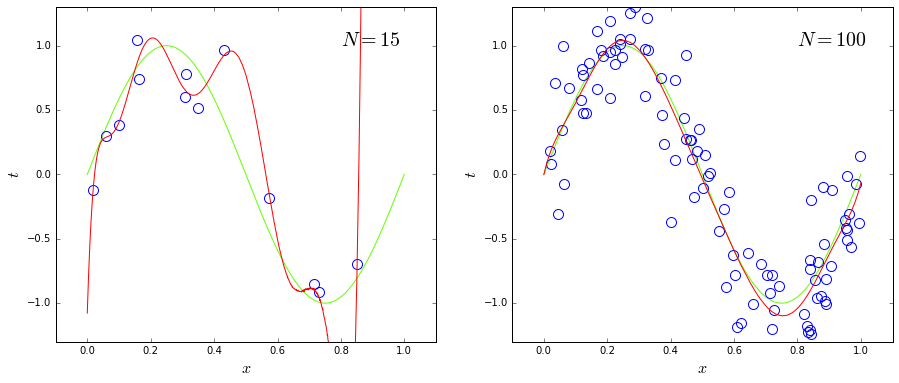

In [29]:
M = 9
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes = np.ravel(axes)
for n, ax in zip([15, 100], axes):
    x_n = np.random.uniform(0, 1, n)
    t_n = np.sin(2 * np.pi * x_n) + np.random.normal(0, 0.3, n)
    w_n = polyfit(x_n, t_n, M)
    ax.plot(x, t, color="#66FF00")
    ax.plot(x_n, t_n, 'o',  markerfacecolor='none' ,markeredgecolor='b', markersize=10, markeredgewidth=1)
    ax.plot(x, predict(w_n, x), 'r')
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-1.3, 1.3)
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$t$', fontsize=16)
    ax.text(0.8, 1, '$N={}$'.format(n), size=20)


### 正则化
当我们没办法获取更多的数据时，就需要限制模型的复杂度了。具体的做法是给目标函数$E(\mathbf{w})$加上一个L2罚项以限制系数的数量级：
$$ \widetilde{E}(\mathbf{w})=\frac{1}{2}\sum_{n=1}^N \{y(x_n,\mathbf{w})-t_n\}^2+\frac{1}{2}\lambda \mathbf{w}^T\mathbf{w}$$
其中$\mathbf{w}^T\mathbf{w}=w_0^2+w_1^2+...+w_M^2$，$\lambda>0$用于控制平方和误差与正则项的相对重要性。一般来说我们会把正则项中的$w_0^2$去掉，这样做的原因是使得结果不依赖于目标变量的原点。这样的技术在统计学中称为*shrinkage*，上面的目标函数是其中的一种特殊情况，称为*岭回归（ridge regression）*，在神经网络中这样的技术被叫作*权重衰减（weight decay）*。下面两张图分别为我们展示了正则项系数$\lambda$的不同取值对结果曲线的影响：


log(lambda)=-inf:
w_0=-0.30, w_1=199.94, w_2=-4412.31, w_3=39899.06, w_4=-188923.70, w_5=516701.57, w_6=-845510.00, w_7=816448.73, w_8=-428812.38, w_9=94409.54, 
log(lambda)=-18:
w_0=-0.32, w_1=10.52, w_2=21.83, w_3=-361.66, w_4=875.99, w_5=-410.48, w_6=-751.65, w_7=274.26, w_8=923.65, w_9=-581.97, 
log(lambda)=0:
w_0=0.23, w_1=-0.40, w_2=-0.44, w_3=-0.30, w_4=-0.15, w_5=-0.02, w_6=0.08, w_7=0.16, w_8=0.22, w_9=0.27, 


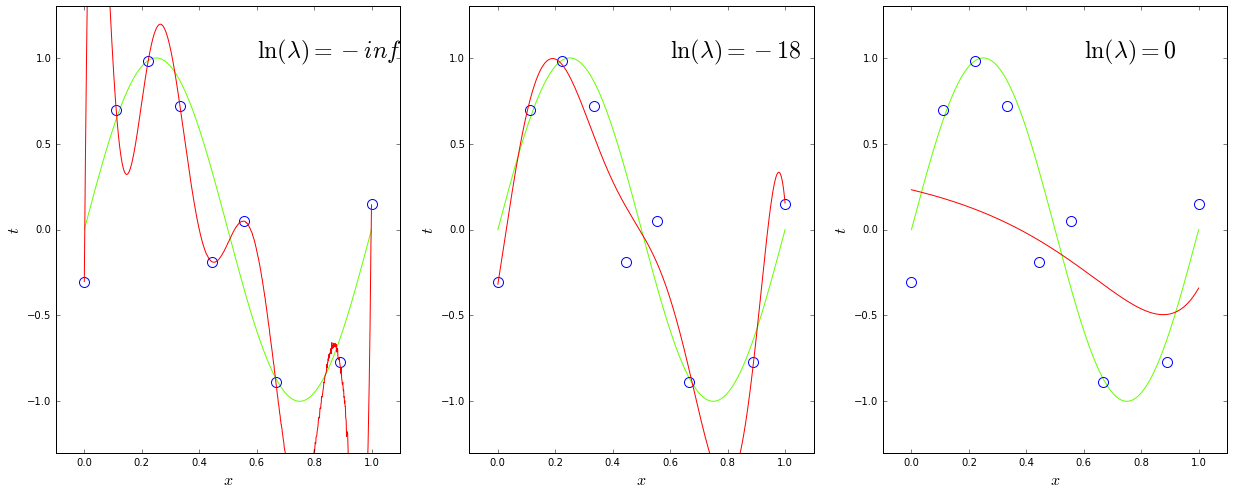

In [30]:
def ridge_regression(x, t,_lambda, M):
    '''ridge regression
    # Arguments:
        x: vector of input variables
        t: targets of input variables
        M: degree of polynomial model
    # Returns:
        coefficients of the polynomial model    
    '''
    Phi = np.array([[xx ** m for m in range(M+1)] for xx in x], dtype='float32')
    U, S, Vh = np.linalg.svd(Phi, full_matrices=False)
    Ut = U.T.dot(t)
    #return np.linalg.solve(Phi.T.dot(Phi) + _lambda * np.eye(M+1)), Phi.T.dot(t))
    return reduce(np.dot, [Vh.T, np.diag(S/(S**2 + _lambda)), Ut])
    
    
M = 9
fig, axes = plt.subplots(1, 3, figsize=(21, 8))
axes = np.ravel(axes)
for log_lambda, ax in zip([-np.inf, -18, 0], axes):
    wgt_info = ''
    w_ridge = ridge_regression(x_tr, t_tr, np.exp(log_lambda), M) 
    ax.plot(x, t, color="#66FF00")
    ax.plot(x_tr, t_tr, 'o',  markerfacecolor='none' ,markeredgecolor='b', markersize=10, markeredgewidth=1)    
    ax.plot(x, predict(w_ridge, x), 'r')
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-1.3, 1.3)
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$t$', fontsize=16)
    ax.text(0.6, 1, '$\ln(\lambda)={}$'.format(log_lambda), size=24)        
    print 'log(lambda)={}:'.format(log_lambda)
    for i, ww in enumerate(w_ridge):
         wgt_info += 'w_{}={:.2f}, '.format(i, ww)
    print wgt_info

当$\ln\ \lambda=-\infty$时，岭回归退化为线性回归，我们可以发现输出的模型参数与线性回归基本一致；当$ln\ \lambda = -18$时，过拟合现象减轻了许多；而当$\ln \ \lambda=0$时，由于正则系数太大，导致模型欠拟合。总的来说，随着正则系数的增加，参数的数量级逐渐衰减，直至趋近于0。在实际中，我们通常用一个验证集或交叉验证来确定$\lambda$的最优取值。